# Lab 3: Tables, Functions and Visualizations

Welcome to lab 3!  

This week, we will focus on manipulating tables, functions, the table method `apply` and histogram plotting. 

In [57]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 1. Introduction

For a collection of things in the world, an array is useful for describing a single attribute of each thing. For example, among the collection of US States, an array could describe the land area of each. Tables extend this idea by describing multiple attributes for each element of a collection.

In most data science applications, we have data about many entities, but we also have several kinds of data about each entity.

For example, in the cell below we have two arrays. The first one contains the world population in each year (estimated by the US Census Bureau), and the second contains the years themselves. These elements are in order, so the year and the world population for that year have the same index in their corresponding arrays.

In [58]:
population_amounts = Table.read_table("world_population.csv").column("Population")
years = np.arange(1950, 2016)
print("Population column:", population_amounts)
print("Years column:", years)

Population column: [2557628654 2594939877 2636772306 2682053389 2730228104 2782098943
 2835299673 2891349717 2948137248 3000716593 3043001508 3083966929
 3140093217 3209827882 3281201306 3350425793 3420677923 3490333715
 3562313822 3637159050 3712697742 3790326948 3866568653 3942096442
 4016608813 4089083233 4160185010 4232084578 4304105753 4379013942
 4451362735 4534410125 4614566561 4695736743 4774569391 4856462699
 4940571232 5027200492 5114557167 5201440110 5288955934 5371585922
 5456136278 5538268316 5618682132 5699202985 5779440593 5857972543
 5935213248 6012074922 6088571383 6165219247 6242016348 6318590956
 6395699509 6473044732 6551263534 6629913759 6709049780 6788214394
 6866332358 6944055583 7022349283 7101027895 7178722893 7256490011]
Years column: [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 

Suppose we want to answer this question:

> When did world population cross 6 billion?

You could technically answer this question just from staring at the arrays, but it's a bit convoluted, since you would have to count the position where the population first crossed 6 billion, then find the corresponding element in the years array. In cases like these, it might be easier to put the data into a *`Table`*, a 2-dimensional type of dataset. 

The expression below:

- creates an empty table using the expression `Table()`,
- adds two columns by calling `with_columns` with four arguments,
- assignes the result to the name `population`, and finally
- evaluates `population` so that we can see the table.

The strings `"Year"` and `"Population"` are column labels that we have chosen. Ther names `population_amounts` and `years` were assigned above to two arrays of the same length. The function `with_columns` (you can find the documentation [here](http://data8.org/datascience/tables.html)) takes in alternating strings (to represent column labels) and arrays (representing the data in those columns), which are all separated by commas.

In [59]:
population = Table().with_columns(
    "Population", population_amounts,
    "Year", years
)
population

Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954
2782098943,1955
2835299673,1956
2891349717,1957
2948137248,1958
3000716593,1959


Now the data are all together in a single table! It's much easier to parse this data--if you need to know what the population was in 1959, for example, you can tell from a single glance. We'll revisit this table later.

## 2. Creating Tables

**Question 2.1.** <br/> In the cell below, we've created 2 arrays. Using the steps above, assign `top_10_movies` to a table that has two columns called "Rating" and "Name", in that order, which hold `top_10_movie_ratings` and `top_10_movie_names` respectively.

In [60]:
top_10_movie_ratings = make_array(9.2, 9.2, 9., 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.8)
top_10_movie_names = make_array(
        'The Shawshank Redemption (1994)',
        'The Godfather (1972)',
        'The Godfather: Part II (1974)',
        'Pulp Fiction (1994)',
        "Schindler's List (1993)",
        'The Lord of the Rings: The Return of the King (2003)',
        '12 Angry Men (1957)',
        'The Dark Knight (2008)',
        'Il buono, il brutto, il cattivo (1966)',
        'The Lord of the Rings: The Fellowship of the Ring (2001)')

top_10_movies = Table().with_columns("ratings", top_10_movie_ratings, "names", top_10_movie_names)

top_10_movies

ratings,names
9.2,The Shawshank Redemption (1994)
9.2,The Godfather (1972)
9,The Godfather: Part II (1974)
8.9,Pulp Fiction (1994)
8.9,Schindler's List (1993)
8.9,The Lord of the Rings: The Return of the King (2003)
8.9,12 Angry Men (1957)
8.9,The Dark Knight (2008)
8.9,"Il buono, il brutto, il cattivo (1966)"
8.8,The Lord of the Rings: The Fellowship of the Ring (2001)


#### Loading a table from a file
In most cases, we aren't going to go through the trouble of typing in all the data manually. Instead, we can use our `Table` functions.

`Table().read_table` takes one argument, a path to a data file (a string) and returns a table.  There are many formats for data files, but CSV ("comma-separated values") is the most common. 

**Question 2.2.** <br/>The file `imdb.csv` contains a table of information about the 250 highest-rated movies on IMDb.  Load it as a table called `imdb`. In our case, `imdb.csv` is located in the same folder as the notebook, so you only need to input the name of the file instead of the full path.

In [61]:
imdb = Table().read_table("imdb.csv")
imdb

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980
425461,8.3,Full Metal Jacket,1987,1980
441174,8.1,Gone Girl,2014,2010
850601,8.3,Batman Begins,2005,2000
37664,8.2,Judgment at Nuremberg,1961,1960
46987,8,Relatos salvajes,2014,2010


Notice the part about "... (240 rows omitted)."  This table is big enough that only a few of its rows are displayed, but the others are still there.  10 are shown, so there are 250 movies total.

Where did `imdb.csv` come from? Take a look at [this lab's folder](./). You should see a file called `imdb.csv`.

Open up the `imdb.csv` file in that folder and look at the format. What do you notice? The `.csv` filename ending says that this file is in the [CSV (comma-separated value) format](http://edoceo.com/utilitas/csv-file-format).

## 3. Using lists

A *list* is another Python sequence type, similar to an array. It's different than an array because the values it contains can all have different types. Furthermore, the properties of lists and arrays differ in their use, which is why we want to specify when to use either one.

A single list can contain `int` values, `float` values, and strings. Elements in a list can even be other lists! A list is created by giving a name to the list of values enclosed in square brackets and separated by commas. For example, `values_with_different_types = ['data', 8, 8.1]`

One example of the difference in list and array properties is below. Run these cells. 

In [62]:
an_array = make_array(1, 2, 3, 4)
an_array * 2

array([2, 4, 6, 8])

In [63]:
a_list = [1, 2, 3, 4]
a_list * 2

[1, 2, 3, 4, 1, 2, 3, 4]

Lists can be useful when working with tables because they can describe the contents of one row in a table, which often  corresponds to a sequence of values with different types. A list of lists can be used to describe multiple rows.

Each column in a table is a collection of values with the same type (an array). If you create a table column from a list, it will automatically be converted to an array. A row, on the ther hand, mixes types.

Here's a table from Chapter 5. (Run the cell below.)

In [64]:
# Run this cell to recreate the table
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


**Question 3.1.** <br/>Create a list that describes a new fourth row of this table. The details can be whatever you want, but the list must contain two values in this order: the number of petals (an `int` value) and the name of the flower (a string). For example, your flower could be "pondweed"! (A flower with zero petals)

In [65]:
my_flower = [8, 'cactus']
my_flower

[8, 'cactus']

**Question 3.2.** <br/>`my_flower` fits right in to the table from chapter 5. Complete the cell below to create a **table of seven flowers** that includes your flower as the fourth row followed by `other_flowers`. You can use `with_row` to create a new table with one extra row by passing a list of values and `with_rows` to create a table with multiple extra rows by passing a list of lists of values.

*Hint:* Don't forget to use the variables you define! We can build off of tables we've already created by simply using the variable name of the other table. 

In [66]:
# Use the method .with_row(...) to create a new table that includes my_flower 

four_flowers = flowers.with_row(my_flower)
four_flowers

# Use the method .with_rows(...) to create a table that 
# includes four_flowers followed by other_flowers

other_flowers = [[10, 'lavender'], [3, 'birds of paradise'], [6, 'tulip']]

seven_flowers = four_flowers.with_rows(other_flowers)
seven_flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose
8,cactus
10,lavender
3,birds of paradise
6,tulip


## 4. Analyzing datasets
With just a few table methods, we can answer some interesting questions about the IMDb dataset.

If we want just the ratings of the movies, we can get an array that contains the data in that column:

In [67]:
imdb.column("Rating")

array([ 8.4,  8.3,  8.3,  8.6,  8.2,  8.3,  8.1,  8.3,  8.2,  8. ,  8.1,
        8.2,  8.3,  8.3,  8.1,  8.4,  8.5,  8.2,  8.1,  8.4,  8.1,  8.1,
        9.2,  8. ,  8.2,  8.1,  8.2,  8.5,  8. ,  8.3,  8.1,  8. ,  8. ,
        8.3,  8.1,  8. ,  8. ,  8.3,  8.4,  8.1,  8.1,  8.5,  8.5,  8. ,
        8.3,  8.1,  8. ,  8.6,  8.5,  8.3,  8.3,  8. ,  8.2,  9.2,  8.2,
        8.5,  8. ,  8.9,  8.4,  8.2,  8.1,  8.3,  8.1,  8.1,  8.1,  8.3,
        8.2,  8.3,  8.7,  8.3,  8.6,  8. ,  8.1,  8.2,  8.5,  8.3,  8.9,
        8. ,  8.6,  8.3,  8.1,  8.7,  8.4,  8.1,  8.4,  8. ,  8.5,  8.8,
        8.2,  8.2,  8.5,  9. ,  8. ,  8. ,  8.3,  8.4,  8.6,  8.5,  8.7,
        8.4,  8.1,  8.1,  8.1,  8.7,  8.4,  8.9,  8.1,  8.2,  8. ,  8.5,
        8.5,  8. ,  8. ,  8.4,  8.1,  8.1,  8. ,  8. ,  8.3,  8.1,  8. ,
        8.3,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8.7,  8.3,  8. ,
        8. ,  8.5,  8. ,  8.1,  8.1,  8.1,  8.3,  8.2,  8.3,  8.9,  8.2,
        8.2,  8. ,  8.3,  8.2,  8.9,  8.5,  8.5,  8

The value of that expression is an array, exactly the same kind of thing you'd get if you typed in `make_array(8.4, 8.3, 8.3, [etc])`.

**Question 4.1.** <br/> Using a table array, find the rating of the highest-rated movie in the dataset.

*Hint:* Think back to the functions you've learned about for working with arrays of numbers.  Ask for help if you can't remember one that's useful for this.

In [68]:
highest_rating = max(imdb.column("Rating"))
highest_rating

9.1999999999999993

That's not very useful, though.  You'd probably want to know the *name* of the movie whose rating you found!  To do that, we can sort the entire table by rating, which ensures that the ratings and titles will stay together. Note that calling sort creates a copy of the table and leaves the original table unsorted.

In [69]:
imdb.sort("Rating")

Votes,Rating,Title,Year,Decade
46987,8,Relatos salvajes,2014,2010
55382,8,Bom yeoreum gaeul gyeoul geurigo bom,2003,2000
32385,8,La battaglia di Algeri,1966,1960
364225,8,Jaws,1975,1970
158867,8,Before Sunrise,1995,1990
56671,8,The Killing,1956,1950
87591,8,Papillon,1973,1970
43090,8,"Paris, Texas (1984)",1984,1980
427099,8,X-Men: Days of Future Past,2014,2010
87437,8,Roman Holiday,1953,1950


Well, that actually doesn't help much, either -- we sorted the movies from lowest -> highest ratings.  To look at the highest-rated movies, sort in reverse order:

In [70]:
imdb.sort("Rating", descending=True)

Votes,Rating,Title,Year,Decade
1027398,9.2,The Godfather,1972,1970
1498733,9.2,The Shawshank Redemption,1994,1990
692753,9,The Godfather: Part II,1974,1970
447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
1473049,8.9,The Dark Knight,2008,2000
384187,8.9,12 Angry Men,1957,1950
1074146,8.9,The Lord of the Rings: The Return of the King,2003,2000
761224,8.9,Schindler's List,1993,1990
1166532,8.9,Pulp Fiction,1994,1990
1177098,8.8,Fight Club,1999,1990


(The `descending=True` bit is called an *optional argument*. It has a default value of `False`, so when you explicitly tell the function `descending=True`, then the function will sort in descending order.)

So there are actually 2 highest-rated movies in the dataset: *The Shawshank Redemption* and *The Godfather*.

Some details about sort:

1. The first argument to `sort` is the name of a column to sort by.
2. If the column has strings in it, `sort` will sort alphabetically; if the column has numbers, it will sort numerically.
3. The value of `imdb.sort("Rating")` is a *copy of `imdb`*; the `imdb` table doesn't get modified. For example, if we called `imdb.sort("Rating")`, then running `imdb` by itself would still return the unsorted table.
4. Rows always stick together when a table is sorted.  It wouldn't make sense to sort just one column and leave the other columns alone.  For example, in this case, if we sorted just the "Rating" column, the movies would all end up with the wrong ratings.

**Question 4.2.** <br/>Create a version of `imdb` that's sorted chronologically, with the earliest movies first.  Call it `imdb_by_year`.

In [71]:
imdb_by_year = imdb.sort("Year")
imdb_by_year

Votes,Rating,Title,Year,Decade
55784,8.3,The Kid,1921,1920
58506,8.2,The Gold Rush,1925,1920
46332,8.2,The General,1926,1920
98794,8.3,Metropolis,1927,1920
88355,8.4,M,1931,1930
92375,8.5,City Lights,1931,1930
56842,8.1,It Happened One Night,1934,1930
121668,8.5,Modern Times,1936,1930
69510,8.2,Mr. Smith Goes to Washington,1939,1930
259235,8.1,The Wizard of Oz,1939,1930


**Question 4.3.** <br/>What's the title of the earliest movie in the dataset?  You could just look this up from the output of the previous cell.  Instead, write Python code to find out.

*Hint:* Starting with `imdb_by_year`, extract the Title column to get an array, then use `item` to get its first item. Don't forget about indexing.

In [72]:
earliest_movie_title = imdb_by_year.column("Title").item(0)
earliest_movie_title

'The Kid'

## 5. Finding pieces of a dataset
Suppose you're interested in movies from the 1940s.  Sorting the table by year doesn't help you, because the 1940s are in the middle of the dataset.

Instead, we use the table method `where`.

In [73]:
forties = imdb.where('Decade', are.equal_to(1940))
forties

Votes,Rating,Title,Year,Decade
55793,8.1,The Grapes of Wrath,1940,1940
86715,8.3,Double Indemnity,1944,1940
101754,8.1,The Maltese Falcon,1941,1940
71003,8.3,The Treasure of the Sierra Madre,1948,1940
35983,8.1,The Best Years of Our Lives,1946,1940
81887,8.3,Ladri di biciclette,1948,1940
66622,8,Notorious,1946,1940
350551,8.5,Casablanca,1942,1940
59578,8,The Big Sleep,1946,1940
78216,8.2,Rebecca,1940,1940


Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`forties`** to a table whose rows are the rows in the **`imdb`** table **`where`** the **`'Decade'`**s **`are` `equal` `to` `1940`**.

**Question 5.1.** <br/>Compute the average rating of movies from the 1940s.

In [74]:
average_rating_in_forties = np.average(forties.column("Rating"))
average_rating_in_forties

8.2571428571428562

Now let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some criterion.
2. Something that describes the criterion that the column needs to meet, called a predicate.

To create our predicate, we called the function `are.equal_to` with the value we wanted, 1940.  We'll see other predicates soon.

`where` returns a table that's a copy of the original table, but with only the rows that meet the given predicate.

**Question 5.2.**<br/> Create a table called `ninety_nine` containing the movies that came out in the year 1999.  Use `where`.

In [75]:
ninety_nine = imdb.where('Year', are.equal_to(1999))
ninety_nine

Votes,Rating,Title,Year,Decade
1177098,8.8,Fight Club,1999,1990
735056,8.4,American Beauty,1999,1990
630994,8.1,The Sixth Sense,1999,1990
1073043,8.7,The Matrix,1999,1990
672878,8.5,The Green Mile,1999,1990


So far we've only been finding where a column is *exactly* equal to a certain value. However, there are many other predicates.  Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

The textbook section on selecting rows has more examples.


**Question 5.3.** <br/>Using `where` and one of the predicates from the table above, find all the movies with a rating higher than 8.5.  Put their data in a table called `really_highly_rated`.

In [76]:
really_highly_rated = imdb.where('Rating', are.above(8.5))
really_highly_rated

Votes,Rating,Title,Year,Decade
635139,8.6,Léon,1994,1990
1027398,9.2,The Godfather,1972,1970
767224,8.6,The Silence of the Lambs,1991,1990
1498733,9.2,The Shawshank Redemption,1994,1990
447875,8.9,"Il buono, il brutto, il cattivo (1966)",1966,1960
967389,8.7,The Lord of the Rings: The Two Towers,2002,2000
689541,8.6,Interstellar,2014,2010
1473049,8.9,The Dark Knight,2008,2000
192206,8.6,C'era una volta il West,1968,1960
1271949,8.7,Inception,2010,2010


**Question 5.4.** <br/>Find the average rating for movies released in the 20th century (defined in this question as 1900-1999) and the average rating for movies released in the 21st century (as 2000-now) for the movies in `imdb`.

*Hint*: Think of the steps you need to do (take the average, find the ratings, find movies released in 20th/21st centuries), and try to put them in an order that makes sense.

In [77]:
average_20th_century_rating = imdb.where("Year", are.between(1900,1999)).column("Rating").mean()
average_21st_century_rating = imdb.where("Year", are.above(1999)).column("Rating").mean()
print("Average 20th century rating:", average_20th_century_rating)
print("Average 21st century rating:", average_21st_century_rating)

Average 20th century rating: 8.27168674699
Average 21st century rating: 8.23797468354


The property `num_rows` tells you how many rows are in a table.  (A "property" is just a method that doesn't need to be called by adding parentheses.)

In [78]:
num_movies_in_dataset = imdb.num_rows
num_movies_in_dataset

250

**Question 5.5.** <br/>Use `num_rows` (and arithmetic) to find the *proportion* of movies in the dataset that were released in the 20th century (1900-1999), and the proportion from the 21st century (2000-now).

*Hint:* The *proportion* of movies released in the 20th century is the *number* of movies released in the 20th century, divided by the *total number* of movies.

In [79]:
proportion_in_20th_century = imdb.where("Year", are.between(1900,1999)).num_rows / num_movies_in_dataset
proportion_in_21st_century = imdb.where("Year", are.above(1999)).num_rows / num_movies_in_dataset
print("Proportion in 20th century:", proportion_in_20th_century)
print("Proportion in 21st century:", proportion_in_21st_century)

Proportion in 20th century: 0.664
Proportion in 21st century: 0.316


**Question 5.6.** <br/>Here's a challenge: Find the number of movies that came out in *even* years.

*Hint:* The operator `%` computes the remainder when dividing by a number.  So `5 % 2` is 1 and `6 % 2` is 0.  A number is even if the remainder is 0 when you divide by 2.

*Hint 2:* `%` can be used on arrays, operating elementwise like `+` or `*`.  So `make_array(5, 6, 7) % 2` is `array([1, 0, 1])`.

*Hint 3:* Create a column called "Year Remainder" that's the remainder when each movie's release year is divided by 2.  Make a copy of `imdb` that includes that column.  Then use `where` to find rows where that new column is equal to 0.  Then use `num_rows` to count the number of such rows.

In [80]:
year_remainder = imdb.column("Year") % 2
extended_imdb = imdb.with_column("Year remainder", year_remainder)
num_even_year_movies = extended_imdb.where("Year remainder", are.equal_to(0)).num_rows
num_even_year_movies

127

**Question 5.7.** <br/>Check out the `population` table from the introduction to this lab.  Compute the year when the world population first went above 6 billion.

In [81]:
year_population_crossed_6_billion = population.where("Population", are.above(6000000000)).column("Year").item(0)
year_population_crossed_6_billion

1999

## 6. Miscellanea
There are a few more table methods you'll need to fill out your toolbox.  The first 3 have to do with manipulating the columns in a table.

The table `farmers_markets.csv` contains data on farmers' markets in the United States  (data collected [by the USDA]([dataset](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)) \).  Each row represents one such market.

**Question 6.1.** <br/>Load the dataset into a table.  Call it `farmers_markets`.

In [82]:
farmers_markets = Table().read_table("farmers_markets.csv")
farmers_markets

FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,Season3Time,Season4Date,Season4Time,x,y,Location,Credit,WIC,WICcash,SFMNP,SNAP,Organic,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmersmarket/,https://www.facebook.com/Danville.VT.Farmers.Market/,nan,nan,nan,nan,Danville,Caledonia,Vermont,05828,06/08/2016 to 10/12/2016,Wed: 9:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-72.1403,44.411,nan,Y,Y,N,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,Y,Y,Y,Y,Y,N,Y,Y,Y,N,Y,N,Y,N,N,6/28/2016 12:10:09 PM
1011871,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,nan,nan,nan,nan,6975 Ridge Road,Parma,Cuyahoga,Ohio,44130,06/25/2016 to 10/01/2016,Sat: 9:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-81.7286,41.3751,nan,Y,Y,N,Y,Y,-,Y,N,N,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,4/9/2016 8:05:17 PM
1011878,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,nan,nan,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,Michigan,49007,05/04/2016 to 10/12/2016,Wed: 3:00 PM-7:00 PM;,nan,nan,nan,nan,nan,nan,-85.5749,42.296,nan,Y,Y,N,Y,Y,N,Y,Y,N,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,N,Y,Y,Y,N,Y,N,N,Y,Y,N,N,N,N,N,4/16/2016 12:37:56 PM
1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,nan,nan,nan,nan,106 S. Main Street,Six Mile,nan,South Carolina,29682,nan,nan,nan,nan,nan,nan,nan,nan,-82.8187,34.8042,nan,Y,N,N,N,N,-,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2013
1010691,10th Steet Community Farmers Market,nan,nan,nan,nan,http://agrimissouri.com/mo-grown/grodetail.php?type=mo-g ...,10th Street and Poplar,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-94.2746,37.4956,nan,Y,N,N,N,N,-,Y,N,Y,N,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
1002454,112st Madison Avenue,nan,nan,nan,nan,nan,112th Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,nan,nan,nan,nan,nan,nan,-73.9493,40.7939,Private business parking lot,N,N,Y,Y,N,-,Y,N,Y,Y,N,N,Y,Y,Y,Y,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM
1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,nan,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,Tennessee,37204,05/05/2015 to 10/27/2015,Tue: 3:30 PM-6:30 PM;,nan,nan,nan,nan,nan,nan,-86.7907,36.1184,nan,Y,N,N,N,Y,Y,Y,Y,N,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,N,Y,Y,Y,N,N,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40:56 AM
1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,nan,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell, Jr. Blvd.",New York,New York,New York,10027,06/10/2014 to 11/25/2014,Tue: 10:00 AM-7:00 PM;,nan,nan,nan,nan,nan,nan,-73.9482,40.809,Federal/State government building grounds,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,Y,N,Y,Y,Y,N,Y,Y,N,Y,N,Y,N,N,N,N,4/7/2014 4:32:01 PM
1005586,12th & Brandywine Urban Farm Market,nan,https://www.facebook.com/pages/12th-Brandywine-Urban-Far ...,nan,nan,https://www.facebook.com/delawareurbanfarmcoalition,12th & Brandywine Streets,Wilmington,New Castle,Delaware,19801,05/16/2014 to 10/17/2014,Fri: 8:00 AM-11:00 AM;,nan,nan,nan,nan,nan,nan,-75.5345,39.7421,"On a farm from: a barn, a greenhouse, a tent, a stand, etc",N,N,N,N,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,4/3/2014 3:43:31 PM
1008071,14&U Farmers' Market,nan,https://www.facebook.com/14UFarmersMarket,https://twitter.com/14UFarmers

You'll notice that it has a large number of columns in it!

### `num_columns`

**Question 6.2.**<br/> The table property `num_columns` (example call: `tbl.num_columns`) produces the number of columns in a table.  Use it to find the number of columns in our farmers' markets dataset.

In [83]:
num_farmers_markets_columns = farmers_markets.num_columns
print("The table has", num_farmers_markets_columns, "columns in it!")

The table has 59 columns in it!


Most of the columns are about particular products -- whether the market sells tofu, pet food, etc.  If we're not interested in that stuff, it just makes the table difficult to read.  This comes up more than you might think.

### `select`

In such situations, we can use the table method `select` to pare down the columns of a table.  It takes any number of arguments.  Each should be the name or index of a column in the table.  It returns a new table with only those columns in it.

For example, the value of `imdb.select("Year", "Decade")` is a table with only the years and decades of each movie in `imdb`.

**Question 6.3.**<br/> Use `select` to create a table with only the MarketName, city, State, latitude ('y'), and longitude ('x') of each market.  Call that new table `farmers_markets_locations`.

In [84]:
# columns = farmers_markets.labels
# print(columns)
farmers_markets_locations = farmers_markets.select("MarketName", "city", "State", "y", "x")
farmers_markets_locations

MarketName,city,State,y,x
Caledonia Farmers Market Association - Danville,Danville,Vermont,44.411,-72.1403
Stearns Homestead Farmers' Market,Parma,Ohio,41.3751,-81.7286
100 Mile Market,Kalamazoo,Michigan,42.296,-85.5749
106 S. Main Street Farmers Market,Six Mile,South Carolina,34.8042,-82.8187
10th Steet Community Farmers Market,Lamar,Missouri,37.4956,-94.2746
112st Madison Avenue,New York,New York,40.7939,-73.9493
12 South Farmers Market,Nashville,Tennessee,36.1184,-86.7907
125th Street Fresh Connect Farmers' Market,New York,New York,40.809,-73.9482
12th & Brandywine Urban Farm Market,Wilmington,Delaware,39.7421,-75.5345
14&U Farmers' Market,Washington,District of Columbia,38.917,-77.0321


### `select` is not `column`!

The method `select` is **definitely not** the same as the method `column`.

`farmers_markets.column('y')` is an *array* of the latitudes of all the markets.  `farmers_markets.select('y')` is a *table* that happens to contain only 1 column, the latitudes of all the markets.

Recognizing this distinction is important because data types determine what we can do with our code.

In [85]:
print(".column will give you the following datatype:", type(farmers_markets.column("y")))

print(".select will give you the following datatype:", type(farmers_markets.select("y")))

.column will give you the following datatype: <class 'numpy.ndarray'>
.select will give you the following datatype: <class 'datascience.tables.Table'>


**Question 6.4.** <br/>Below, we tried using the function `np.average` to find the average latitude ('y') and average longitude ('x') of the farmers' markets in the table, but we screwed something up.  Run the cell to see the (somewhat inscrutable) error message that results from calling `np.average` on a table.  Then, fix our code.

In [86]:
average_latitude = np.average(farmers_markets.column("y"))
average_longitude = np.average(farmers_markets.column("x"))
print("The average of US farmers' markets' coordinates is located at (", average_latitude, ",", average_longitude, ")")

The average of US farmers' markets' coordinates is located at ( 39.1864645235 , -90.9925808129 )


### `drop`

`drop` serves the same purpose as `select`, but it takes away the columns you list instead of the ones you don't list, leaving all the rest of the columns. This is usually easier when you want to keep a lot of columns. 

**Question 6.5.** <br/>Suppose you just didn't want the "FMID" or "updateTime" columns in `farmers_markets`.  Create a table that's a copy of `farmers_markets` but doesn't include those columns.  Call that table `farmers_markets_without_fmid`.

In [87]:
farmers_markets_without_fmid = farmers_markets.drop("FMID","updateTime")
print("you dropped", set(farmers_markets_without_fmid) ^ set(farmers_markets))

you dropped {'FMID', 'updateTime'}


#### `take`
Let's find the 5 northernmost farmers' markets in the US.  You already know how to sort by latitude ('y'), but we haven't seen how to get the first 5 rows of a table.  That's what `take` is for.

The table method `take` takes as its argument an array of numbers.  Each number should be the index of a row in the table.  It returns a new table with only those rows.

Most often you'll want to use `take` in conjunction with `np.arange` to take the first few rows of a table. For example: `tbl.take(np.arange(3))` gives us the first 3 rows, because np.arange creates an array of the indices (0, 1, 2).

**Question 6.6.** <br/>Make a table of the 5 northernmost farmers' markets in `farmers_markets_locations`.  Call it `northern_markets`.  (It should include the same columns as `farmers_markets_locations`.

In [88]:
northern_markets = farmers_markets.sort("y", descending=True).take(np.arange(0,5))
northern_markets

FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,Season3Time,Season4Date,Season4Time,x,y,Location,Credit,WIC,WICcash,SFMNP,SNAP,Organic,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
1004890,Tanana Valley Farmers Market,http://www.tvfmarket.com,https://www.facebook.com/pages/Tanana-Valley-Farmers-Mar ...,nan,nan,nan,2600 College Road,Fairbanks,Fairbanks North Star,Alaska,99709,05/10/2014 to 09/21/2014,Wed: 11:00 AM-4:00 PM;Sat: 9:00 AM-4:00 PM;Sun: 11:00 AM ...,nan,nan,nan,nan,nan,nan,-147.781,64.8628,Other,Y,Y,N,Y,Y,Y,Y,N,Y,Y,Y,N,Y,Y,Y,Y,N,N,N,N,Y,N,Y,Y,Y,N,Y,N,N,N,N,Y,N,N,Y,4/22/2014 12:35:28 PM
1000189,Ester Community Market,http://www.esteralaska.com,nan,nan,nan,nan,"Ester Community Park, Old Nenana Highway",Ester,Fairbanks North Star,Alaska,99725,nan,nan,nan,nan,nan,nan,nan,nan,-148.01,64.8459,Local government building grounds,N,Y,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2/19/2012 5:16:04 PM
1000199,Fairbanks Downtown Market,http://www.downtownfairbanks.com,https://www.facebook.com/downtownfairbanks,https://twitter.com/DTFairbanksAK,nan,nan,1st Avenue,Fairbanks,Fairbanks North Star,Alaska,99701,06/02/2014 to 09/08/2014,Mon: 4:00 PM-8:00 PM;,nan,nan,nan,nan,nan,nan,-147.72,64.8444,Local government building grounds,Y,Y,N,N,Y,Y,Y,N,N,Y,Y,N,Y,Y,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,4/22/2014 1:07:46 PM
1006131,Nenana Open Air Market,nan,nan,nan,nan,nan,Corner of Parks Highway & Main Street,Nenana,nan,Alaska,99704,nan,nan,nan,nan,nan,nan,nan,nan,-149.096,64.5566,nan,N,N,N,N,N,-,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2009
1005848,Highway's End Farmers' Market,http://www.alaska-highway.org/farmersmarket/index.html,https://www.facebook.com/pages/Delta-Highways-End-Farmer ...,nan,nan,nan,Corner of Alaska Highway and Richardson Highway,Delta Junction,Fairbanks North Star,Alaska,99737,05/23/2015 to 09/12/2015,Wed: 10:00 AM-5:00 PM;Sat: 10:00 AM-5:00 PM;,nan,nan,nan,nan,nan,nan,-145.733,64.0385,nan,Y,Y,N,Y,N,-,Y,N,Y,N,Y,N,Y,Y,Y,Y,N,N,N,N,Y,N,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,5/7/2015 11:05:57 AM


## 7. Functions and CEO Incomes

We'll look at the 2015 compensation of CEOs at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies.  Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the data in raw form from the LA Times page into a file called `raw_compensation.csv`.  (The page notes that all dollar amounts are in millions of dollars.)

In [89]:
raw_compensation = Table.read_table('raw_compensation.csv')
raw_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256


**Question 7.1.** <br/> We want to compute the average of the CEOs' pay. Try running the cell below.

In [90]:
np.average(raw_compensation.column("Total Pay"))

TypeError: cannot perform reduce with flexible type

You should see an error. Let's examine why this error occured by looking at the values in the "Total Pay" column. Use the `type` function and set `total_pay_type` to the type of the first value in the "Total Pay" column.

In [93]:
total_pay_type = type(raw_compensation.column("Total Pay").item(0))
total_pay_type

str

**Question 7.2.** <br/>You should have found that the values in "Total Pay" column are strings (text). It doesn't make sense to take the average of the text values, so we need to convert them to numbers if we want to do this. Extract the first value in the "Total Pay" column.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [94]:
mark_hurd_pay_string = raw_compensation.column("Total Pay").item(0)
mark_hurd_pay_string

'$53.25 '

**Question 7.3.** <br/>Convert `mark_hurd_pay_string` to a number of *dollars*.  The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  You'll also need the function `float`, which converts a string that looks like a number to an actual number.  Last, remember that the answer should be in dollars, not millions of dollars.

In [95]:
mark_hurd_pay = float(mark_hurd_pay_string.strip("$"))
mark_hurd_pay

53.25

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab we'll see the payoff: we can call that function on every pay string in the dataset at once.

**Question 7.4.** <br/>Copy the expression you used to compute `mark_hurd_pay` as the `return` expression of the function below, but replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line of the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `pay_string` for this function. 

In [96]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    return float(pay_string.strip("$"))

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert any string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument, a string, and it returns a number.

In [97]:
convert_pay_string_to_number('$42')

42.0

In [98]:
convert_pay_string_to_number(mark_hurd_pay_string)

53.25

In [99]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.where("Name", are.containing("Safra")).column("Total Pay").item(0))

53.24

So, what have we gained by defining the `convert_pay_string_to_number` function? 
Well, without it, we'd have to copy that `10**6 * float(pay_string.strip("$"))` stuff each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every pay string in a single expression. First, let's take a brief detour and introduce `interact`.

### Using `interact`

We've included a nifty function called `interact` that allows you to
call a function with different arguments.

To use it, call `interact` with the function you want to interact with as the
first argument, then specify a default value for each argument of the original
function like so:

In [100]:
_ = interact(convert_pay_string_to_number, pay_string='$42')

interactive(children=(Text(value='$42', description='pay_string'), Output()), _dom_classes=('widget-interact',…

You can now change the value in the textbox to automatically call
`convert_pay_string_to_number` with the argument you enter in the `pay_string`
textbox. For example, entering in `'$49'` in the textbox will display the result of
running `convert_pay_string_to_number('$49')`. Neat!

Note that we'll never ask you to write the `interact` function calls yourself as
part of a question. However, we'll include it here and there where it's helpful
and you'll probably find it useful to use yourself.

Now, let's continue on and write more functions.

## 8. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
Note that `return` inside a function gives the function a value, while `print`, which we have used before, is a function which has no `return` value and just prints a certain value out to the console. The two are very different. 

**Question 8.1.** <br/>Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

In [101]:
def to_percentage(proportion):
    """ Converts a proportion to a percentage """
    factor = 100
    return proportion * factor

twenty_percent = to_percentage(0.2)
twenty_percent

20.0

Like the built-in functions, you can use named values as arguments to your function.

**Question 8.2.** <br/>Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [102]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

Here's something important about functions: the names assigned within a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, you cannot refer to `factor` anywhere except inside the body of `to_percentage`:

In [103]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

NameError: name 'factor' is not defined

As we've seen with the built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 8.3.** <br/>Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  The `.replace` method for strings returns another string, so you can call `replace` multiple times, one after the other. 

In [113]:
def disemvowel(a_string):
    """Removes all vowels from a string."""
    vowels = "aeiouAEIOU"
    for vowel in vowels:
        a_string = a_string.replace(vowel, "")
    return a_string

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'n y rd ths wtht vwls?'

In [ ]:
# Alternatively, you can use interact to call your function
_ = interact(disemvowel, a_string='Hello world')

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the sprinkles.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 8.4.** <br/>Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

In [117]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(disemvowel(a_string))

# Try calling your function yourself to make sure the output is what
# you expect. You can also use the interact function if you'd like.
print(num_non_vowels("Can you read this without vowels?"))
print(len("Can you read this without vowels?"))

22
33


Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [120]:
movies_by_year = Table.read_table("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(rank-1)
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2010


Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2009,10595.5,521,Avatar
2010,10565.6,536,Toy Story 3
2014,10360.8,702,American Sniper
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2007,9663.8,631,Spider-Man 3
2008,9630.7,608,The Dark Knight
2004,9380.5,551,Shrek 2


After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 8.5.** <br/>Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement.

In [119]:
def print_kth_top_movie_year(k):
    # Our solution used 2 lines.
    kth_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(k-1)
    print("Year number", k, "for total gross movie sales was:", kth_top_movie_year)

# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Year number 2 for total gross movie sales was: 2013
Year number 3 for total gross movie sales was: 2012


In [121]:
# interact also allows you to pass in an array for a function argument. It will
# then present a dropdown menu of options.
_ = interact(print_kth_top_movie_year, k=np.arange(1, 10))

interactive(children=(Dropdown(description='k', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Output()), _dom…

##### Print is not the same as Return
The `print_kth_top_movie_year(k)` function prints the total gross movie sales for the year that was provided! However, since we did not return any value in this function, we can not use it after we call it. Let's look at an example of a function that prints a value but does not return it.

In [122]:
def print_number_five():
    print(5)

In [123]:
print_number_five()

5


However, if we try to use the output of `print_number_five()`, we see that we get an error when we try to add the number 5 to it!

In [124]:
print_number_five_output = print_number_five()
print_number_five_output + 5

5


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

It may seem that `print_number_five()` is returning a value, 5. In reality, it just displays the number 5 to you without giving you the actual value! If your function prints out a value without returning it and you try to use it, you will run into errors so be careful!

## 9. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "the"!

For example, we can make a new name for the built-in function `max` if we want:

In [125]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [126]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [127]:
max

<function max>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [128]:
make_array(max, np.average, are.equal_to)

array([<built-in function max>, <function average at 0x7fd8eb0a8dc0>,
       <function are.equal_to at 0x7fd8edf7ee50>], dtype=object)

**Question 9.1.** <br/>Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

In [130]:
some_functions = make_array(max, len, np.average)
some_functions

array([<built-in function max>, <built-in function len>,
       <function average at 0x7fd8eb0a8dc0>], dtype=object)

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [131]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

7

Here's a simpler example that's actually useful: the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an array of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [132]:
raw_compensation.apply(convert_pay_string_to_number, "Total Pay")

array([  5.32500000e+01,   5.32400000e+01,   4.49100000e+01,
         3.59800000e+01,   3.33600000e+01,   2.48400000e+01,
         2.20400000e+01,   1.98600000e+01,   1.96200000e+01,
         1.93200000e+01,   1.87600000e+01,   1.86100000e+01,
         1.83600000e+01,   1.80900000e+01,   1.71000000e+01,
         1.66300000e+01,   1.63300000e+01,   1.61400000e+01,
         1.61000000e+01,   1.60200000e+01,   1.51000000e+01,
         1.49800000e+01,   1.46300000e+01,   1.45100000e+01,
         1.44400000e+01,   1.43600000e+01,   1.43100000e+01,
         1.40900000e+01,   1.40000000e+01,   1.36700000e+01,
         1.23400000e+01,   1.22000000e+01,   1.21800000e+01,
         1.21300000e+01,   1.20500000e+01,   1.18400000e+01,
         1.17100000e+01,   1.16300000e+01,   1.11600000e+01,
         1.11100000e+01,   1.11100000e+01,   1.07300000e+01,
         1.05000000e+01,   1.04300000e+01,   1.03700000e+01,
         1.02800000e+01,   1.02700000e+01,   1.01800000e+01,
         1.01600000e+01,

Here's an illustration of what that did:

<img src="apply.png" alt="For each value in the column 'Total Pay', the function `convert_pay_string_to_number` was applied."/>

Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 9.2.** <br/>Using `apply`, make a table that's a copy of `raw_compensation` with one more column called "Total Pay (\$)".  It should be the result of applying `convert_pay_string_to_number` to the "Total Pay" column, as we did above, and creating a new table which is the old one, but with the "Total Pay" column redone.  Call the new table `compensation`.

In [133]:
compensation = raw_compensation.with_column(
    "Total Pay ($)",
    raw_compensation.apply(convert_pay_string_to_number, "Total Pay"))
compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362,53.25
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362,53.24
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,44.91
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,35.98
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,33.36
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,24.84
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,22.04
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,19.86
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,19.62
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,19.32


Now that we have the pay in numbers, we can compute things about them.

**Question 9.3.**<br/>Compute the average total pay of the CEOs in the dataset.

In [134]:
average_total_pay = np.average(compensation.column("Total Pay ($)"))
average_total_pay

11.445294117647055

**Question 9.4.** <br/>Companies pay executives in a variety of ways: directly in cash; by granting stock or other "equity" in the company; or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

*Note:* You might get a scary red error block but still receive an output. This is because the Total Pay for some CEOs, like Lawrence Page, is listed as 0, and as a result, you might be dividing by 0. This usually causes an error, but because we have an array, Python will try to return the calculations for the rest of the values instead of terminating the program completely. Treat the block as a warning. 

In [136]:
cash_proportion = compensation.apply(convert_pay_string_to_number, "Cash Pay") / compensation.column("Total Pay ($)")
cash_proportion

/var/folders/wf/xv73h74d6t185xgzct38jv400000gn/T/ipykernel_28043/4045390536.py:1: RuntimeWarning: invalid value encountered in true_divide
  cash_proportion = compensation.apply(convert_pay_string_to_number, "Cash Pay") / compensation.column("Total Pay ($)")


array([ 0.01784038,  0.01784373,  0.55421955,  0.02779322,  0.13938849,
        0.48711755,  0.19555354,  0.12437059,  0.25993884,  0.35196687,
        0.3075693 ,  0.22138635,  0.13126362,  0.1708126 ,  0.23099415,
        0.06734817,  0.13043478,  0.28004957,  0.33229814,  0.15355805,
        0.29337748,  0.21829105,  0.31100478,  0.25086147,  0.2299169 ,
        0.16991643,  0.31795947,  0.26188786,  0.28357143,  0.15654718,
        0.38168558,  0.28934426,  0.20361248,  0.47650453,  0.45643154,
        0.36402027,  0.2177626 ,  0.24763543,  0.42562724,  0.2610261 ,
        0.18361836,  0.1444548 ,  0.33333333,  0.10834132,  0.20925747,
        0.97276265,  0.22979552,  0.22789784,  0.37893701,  0.25175527,
        0.73895582,  0.37018256,  0.2412731 ,  0.2133758 ,  0.20553781,
        0.23318872,  0.33664459,  0.3875969 ,  0.56094808,  0.11757991,
        0.35239207,  0.24463007,  0.25      ,  0.23712575,  0.43377886,
        0.31424936,  0.46363636,  0.32585752,  0.24766977,  0.98

Check out the "% Change" column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the "Total Pay" column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is \\$100 this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$100}{1 + \frac{50}{100}}$, or around \$66.66.

**Question 9.5.** <br/>Create a new table called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called "2014 Total Pay ($)".  That column should have each CEO's pay in 2014.

*Hint:* This question takes several steps, but each one is still something you've seen before.  Take it one step at a time, using as many lines as you need.  You can print out your results after each step to make sure you're on the right track. 

*Hint 2:* It'll help to define a function.  You can do that just above your other code.

In [144]:
# Definition to turn percent to number
def percent_string_to_num(percent_string):
    return float(percent_string.strip("%"))

# Compensation table where there is a previous year
having_previous_year = compensation.where("% Change", are.not_equal_to("(No previous year)"))

# Get the percent changes as numbers instead of strings
percent_changes = having_previous_year.apply(percent_string_to_num, "% Change")

# Calculate the previous years pay
previous_pay = having_previous_year.column("Total Pay ($)") / (1 + percent_changes / 100)

# Put the previous pay column into the compensation table
with_previous_compensation = having_previous_year.with_column("Previous Year Pay", previous_pay)

with_previous_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),Previous Year Pay
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,44.91,46.299
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,35.98,42.3294
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,33.36,39.7143
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,24.84,25.875
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,22.04,25.9294
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,19.86,15.6378
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,19.62,16.4874
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,19.32,21.4667
11,John C. Martin**,Gilead Sciences (Foster City),$18.76,-1%,$5.77,$12.98,$0.01,117,18.76,18.9495
13,Shantanu Narayen,Adobe Systems (San Jose),$18.36,3%,$2.41,$15.85,$0.09,125,18.36,17.8252


**Question 9.6.** <br/>What was the average pay of these CEOs in 2014?

In [146]:
average_pay_2014 = np.average(with_previous_compensation.column("Previous Year Pay"))
average_pay_2014

11.649176115603435

## 10. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* to display more information about a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 10.1.** <br/>Make a histogram of the pay of the CEOs in `compensation`.

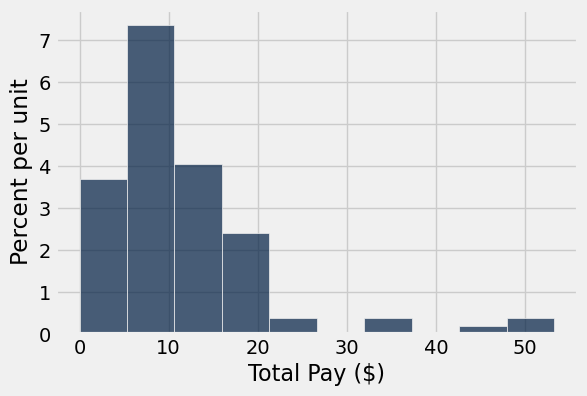

In [148]:
compensation.hist("Total Pay ($)")

**Question 10.2.** <br/>Looking at the histogram, how many CEOs made more than \$30 million?  (Answer the question by filling in your answer manually.  You'll have to do a bit of arithmetic; feel free to use Python as a calculator.)

In [155]:
num_ceos_more_than_30_million = len(compensation.column("Total Pay ($)"))
num_ceos_more_than_30_million

102

**Question 10.3.**<br/> Answer the same question with code. 

*Hint:* Use the table method `where` and the property `num_rows`.

In [154]:
num_ceos_more_than_30_million_2 = compensation.where("Total Pay ($)", are.above(30)).num_rows
num_ceos_more_than_30_million_2

5

## 11. Summary

For your reference, here's a table of all the functions and methods we saw in this lab.

|Name|Example|Purpose|
|-|-|-|
|`Table`|`Table()`|Create an empty table, usually to extend with data|
|`Table.read_table`|`Table.read_table("my_data.csv")`|Create a table from a data file|
|`with_columns`|`tbl = Table().with_columns("N", np.arange(5), "2*N", np.arange(0, 10, 2))`|Create a copy of a table with more columns|
|`column`|`tbl.column("N")`|Create an array containing the elements of a column|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|
|`take`|`tbl.take(np.arange(0, 6, 2))`|Create a copy of the table with only the rows whose indices are in the given array|

## 12. Submission

To submit your assignment, please download your notebook as a .ipynb file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as... > Notebook (.ipynb) or HTML (.html). Then, upload your files under "Lab 3" on Canvas.